In [3]:
import pandas as pd
from statsmodels.nonparametric.smoothers_lowess import lowess
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

In [82]:
oromia_crops = pd.read_csv('/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/Final_TS/oromia_cropland.csv', parse_dates=['DT'], index_col='DT')

In [83]:
oromia_crops

,SM,TMP,P,LST,NDVI,PET
DT,,,,,,
2002-07-01,0.287527,24.733244,50.301555,31.827370,145.873362,42.680006
2002-07-11,0.316382,23.240230,52.737837,27.776697,146.601611,36.707542
2002-07-21,0.350147,22.080869,93.417230,26.175680,147.212190,40.164620
2002-08-01,0.365258,21.788326,67.461683,25.141314,150.439254,34.163019
2002-08-11,0.367684,22.032478,66.042837,25.141314,156.237916,35.405409
...,...,...,...,...,...,...
2016-11-11,0.235211,24.360303,3.534769,31.563542,150.806441,40.801866
2016-11-21,0.229375,24.468656,8.338066,29.338357,146.610087,34.222073
2016-12-01,0.220167,23.653962,2.530774,32.908701,143.357177,38.554469


# Smoothing

In [74]:
#df_ma = edm_test.LST.rolling(15,center=True,closed='both').mean()
#NDVI_loess_5 = pd.DataFrame(lowess(oromia_crops.NDVI, np.arange(len(oromia_crops.NDVI)), frac=0.05)[:, 1], index=oromia_crops.index, columns=['NDVI'])
P_loess_5 = pd.DataFrame(lowess(oromia_crops.P, np.arange(len(oromia_crops.P)), frac=0.02)[:, 1], index=oromia_crops.index, columns=['P'])
LST_loess_5 = pd.DataFrame(lowess(oromia_crops.LST, np.arange(len(oromia_crops.LST)), frac=0.05)[:, 1], index=oromia_crops.index, columns=['LST'])
PET_loess_5 = pd.DataFrame(lowess(oromia_crops.PET, np.arange(len(oromia_crops.PET)), frac=0.02)[:, 1], index=oromia_crops.index, columns=['PET'])
SM_loess_5 = pd.DataFrame(lowess(oromia_crops.SM, np.arange(len(oromia_crops.SM)), frac=0.02)[:, 1], index=oromia_crops.index, columns=['SM'])
TMP_loess_5 = pd.DataFrame(lowess(oromia_crops.TMP, np.arange(len(oromia_crops.TMP)), frac=0.02)[:, 1], index=oromia_crops.index, columns=['TMP'])

In [104]:
oromia_crops_smoothed_df = pd.DataFrame({'SM': SM_loess_5['SM'],
                   'TMP': TMP_loess_5['TMP'],
                   'P':P_loess_5['P'],
                   'LST':LST_loess_5['LST'],
                   'NDVI':oromia_crops['NDVI'],
                   'PET':PET_loess_5['PET']
                  }, index=oromia_crops.index)

In [106]:
oromia_crops_smoothed_df.to_csv('oromia_crops_smoothed.csv')

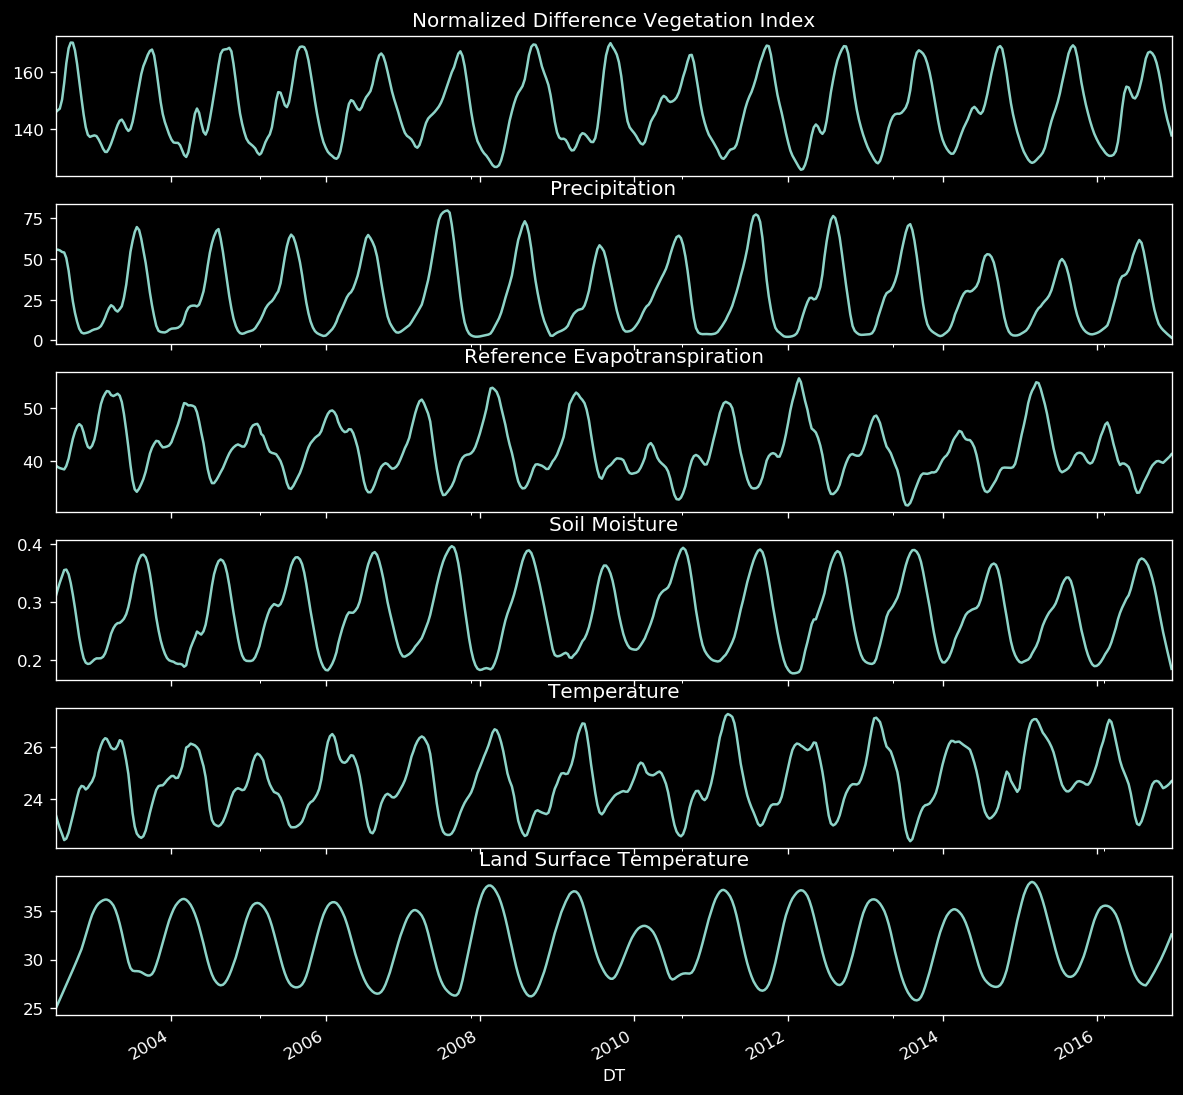

In [109]:
plt.style.use('dark_background')
fig, axes = plt.subplots(6,1, figsize=(12, 12), sharex=True, dpi=120)
oromia_crops['NDVI'].plot(ax=axes[0], title='Normalized Difference Vegetation Index')
P_loess_5['P'].plot(ax=axes[1], title='Precipitation')
PET_loess_5['PET'].plot(ax=axes[2], title='Reference Evapotranspiration')
SM_loess_5['SM'].plot(ax=axes[3], title='Soil Moisture')

#oromia_crops['TMP'].plot(ax=axes[2], title='Normalized Difference Vegetation Index')
TMP_loess_5['TMP'].plot(ax=axes[4], title='Temperature')
LST_loess_5['LST'].plot(ax=axes[5], title='Land Surface Temperature')
plt.savefig('oromia_ts_compare.png')

In [93]:
NDVI = oromia_crops['NDVI'].to_list()
P = P_loess_5['P'].to_list()
SM = SM_loess_5['SM'].to_list()
TMP = TMP_loess_5['TMP'].to_list()
PET = PET_loess_5['PET'].to_list()
LST = LST_loess_5['LST'].to_list()

In [ ]:
from scipy.interpolate import make_interp_spline, BSpline

T = np.array([6, 7, 8, 9, 10, 11, 12])
xnew = np.linspace(T.min(),T.max(),300) #300 represents number of points to make between T.min and T.max



spl = make_interp_spline(T, power, k=3) #BSpline object
power_smooth = spl(xnew)

plt.plot(xnew,power_smooth)
plt.show()

NameError: name 'NDVI' is not defined

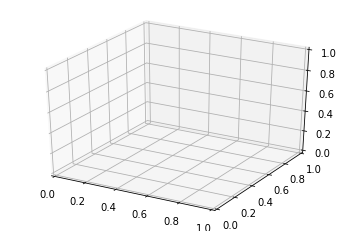

In [56]:


import pandas as pd

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(NDVI, P, LST, 'gray')

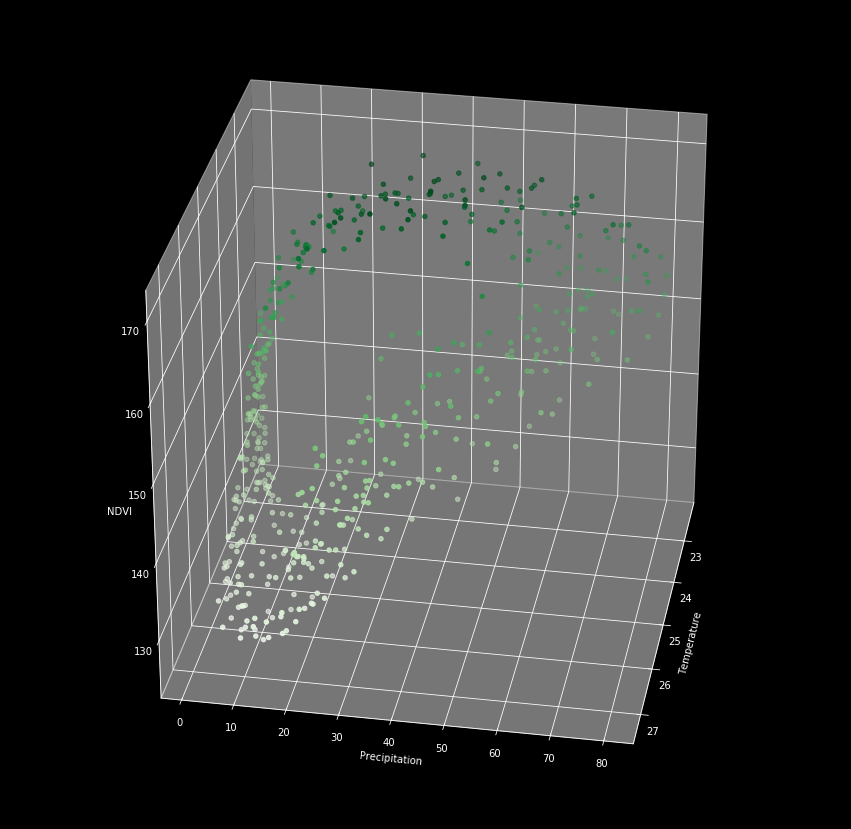

In [95]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.scatter3D(TMP,P,NDVI, c = NDVI, cmap='Greens')
ax.set_xlabel('Temperature')
ax.set_ylabel('Precipitation')
ax.set_zlabel('NDVI')
ax.view_init(30,10)
plt.savefig('3D_ndvi.png', dpi=100)

In [ ]:
NDVI

In [ ]:
from sklearn import preprocessing

In [ ]:
names = edm_test[2:5].columns
# scaler = preprocessing.StandardScaler()
# scaled_df = scaler.fit_transform(edm_test[2:5])
# scaled_df = pd.DataFrame(scaled_df, columns=names)

In [ ]:
edm_test[3:5]